In [1]:
import numpy as np
import os
import random
import cv2
import dlib
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
# Import landmarks.csv
landmarks = pd.read_csv('landmarks.csv')

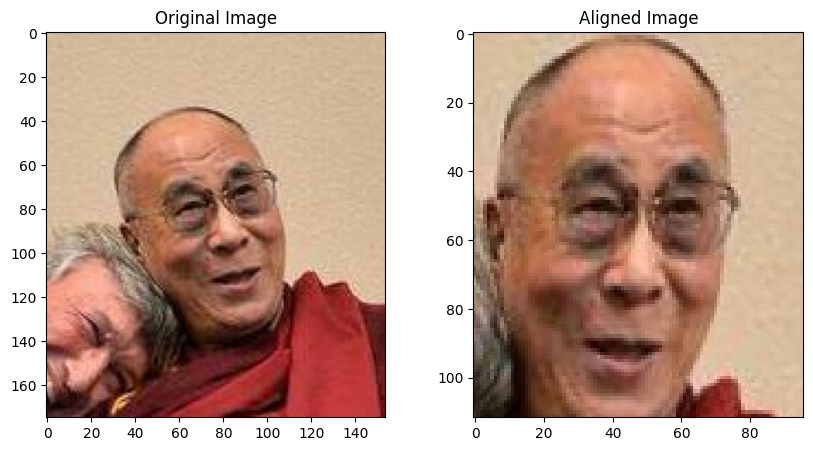

In [3]:
def align_face(image_path):
    # Find the row in the landmarks dataframe that matches the image_path
    row = landmarks[landmarks['image_path'] == image_path]
    
    if row.empty:
        print(f"No landmark data found for {image_path}")
        return
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image {image_path}")
        return
    
    # Extract landmark points
    landmarks_points = []
    for i in range(68):
        x = row[f'x_{i}'].values[0]
        y = row[f'y_{i}'].values[0]
        landmarks_points.append((x, y))
    
    # Convert to numpy array
    landmarks_points = np.array(landmarks_points, dtype=np.float32)
    
    # Define the desired landmark points for a neutral face
    neutral_landmarks = np.array([
        (30.2946, 51.6963),
        (65.5318, 51.5014),
        (48.0252, 71.7366),
        (33.5493, 92.3655),
        (62.7299, 92.2041)
    ], dtype=np.float32)
    
    # Select corresponding points from the detected landmarks
    selected_points = np.array([
        landmarks_points[36],  # left eye left corner
        landmarks_points[45],  # right eye right corner
        landmarks_points[30],  # nose tip
        landmarks_points[48],  # left mouth corner
        landmarks_points[54]   # right mouth corner
    ], dtype=np.float32)
    
    # Compute the transformation matrix
    transformation_matrix = cv2.getAffineTransform(selected_points[:3], neutral_landmarks[:3])
    
    # Apply the transformation to the image
    aligned_image = cv2.warpAffine(image, transformation_matrix, (96, 112))
    
    # Plot the original and aligned images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
    plt.title('Aligned Image')
    
    plt.show()

# Example usage
align_face('VGGFace2_Small/n000001/0154_01.jpg')